In [2]:
%%html
<div style="
    background-color: #3498db;
    color: white;
    border: 5px solid #2980b9;
    border-radius: 10px;
    text-align: center;
    font-size: 4em;
    font-family: Arial, sans-serif; 
    font-weight: bold; 
    padding: 30px;
">
    شیکردنەوەی داتای تۆمارکردنی هۆتێل<br> (Hotel Booking Data Analysis)
</div>

<h2 style="
font-size: 3em;
">
سەرەتا پاکێجە پێویستەکان ئیمپۆڕت ئەکەین<h2>

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
%%html
<h2 style="font-size: 3em;">فایلەکە ئەگۆڕین بۆ داتافرەیم read_csv بە مێثۆدیی</h2><h2 style="font-size: 3em;">  هەندێکی لێ نیشان ئەدەین head وە بە مێثۆدیی </h2>

In [5]:
data = pd.read_csv('hotel_booking.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [25]:
%%html
<h2 style="font-size: 3em;">ئەو کاتە حساب دەکەین کە پێمان دەچێت بۆ ڕاکێشانی زانیاری. وە بەمەش دەزانین کە داتاکە تا چەند گەورەیە

In [26]:
%%time
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           69999 non-null  object 
 1   is_canceled                     69999 non-null  int64  
 2   lead_time                       69999 non-null  int64  
 3   arrival_date_year               69999 non-null  int64  
 4   arrival_date_month              69999 non-null  object 
 5   arrival_date_week_number        69999 non-null  int64  
 6   arrival_date_day_of_month       69999 non-null  int64  
 7   stays_in_weekend_nights         69999 non-null  int64  
 8   stays_in_week_nights            69999 non-null  int64  
 9   adults                          69999 non-null  int64  
 10  children                        69995 non-null  float64
 11  babies                          69999 non-null  int64  
 12  meal                            

In [37]:
%%html
<h2 style="font-size: 3em">ئەو ستوونانەی کەلە ژمارە پێکهاتوون ئەتوانین کۆی هەموو ژمارەکانی ناوی حساب بکەین

In [38]:
data['stays_in_weekend_nights'].sum()

np.int64(71295)

In [39]:
%%html
<h2 style="font-size: 3em">دەتوانین ڕێژەی دووبارە بوونەوەی هەر بەهایەک لەناو ستوونێکدا دیاری بکەین

In [40]:
each_country_counts = data['country'].value_counts()
each_country_counts

country
PRT    33262
GBR     8229
ESP     5758
FRA     3723
IRL     2520
       ...  
BHS        1
TGO        1
DJI        1
STP        1
UMI        1
Name: count, Length: 149, dtype: int64

In [41]:
%%html
<h2 style="font-size: 3em;">ئەتوانین خانە بەتاڵەکانی ناو هەر ستوونێک بە جیا حساب بکەین<h2>

In [42]:
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             486
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10493
company                           66215


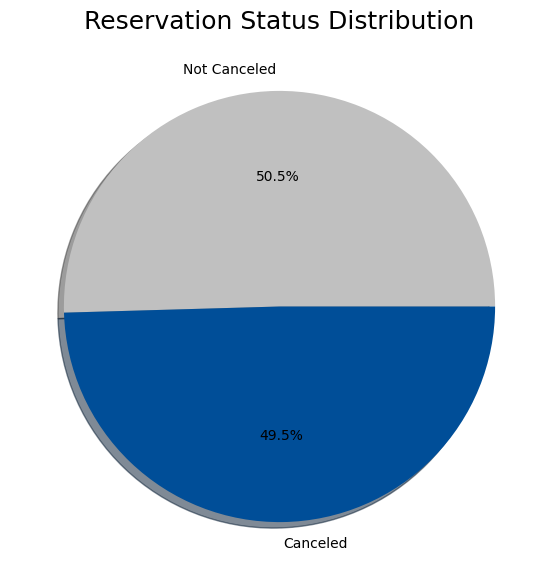

In [43]:
fig = plt
fig.figure(figsize=(7,7))
fig.title("Reservation Status Distribution", fontsize =18)
fig.pie(data['is_canceled'].value_counts(), labels=["Not Canceled", "Canceled"], autopct="%1.1f%%", shadow = True, colors=['#c0c0c0',"#004e98"])
fig.show()

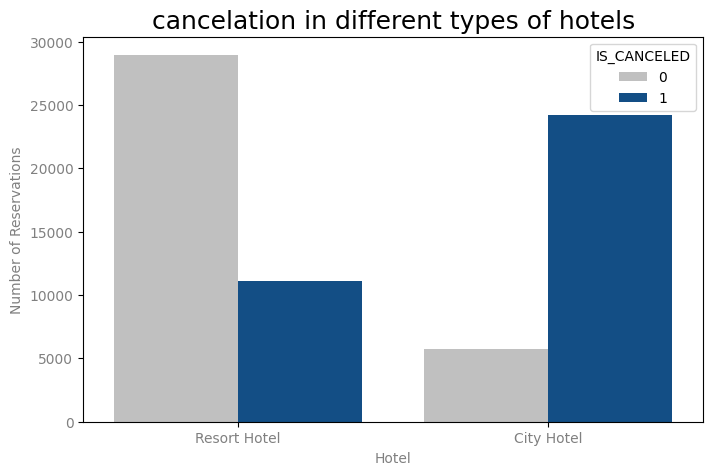

In [44]:


plt.figure(figsize=(8, 5))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=data, palette=["#c0c0c0", "#004e98"])


ax1.legend(bbox_to_anchor=(1, 1), title="IS_CANCELED")

plt.tick_params(axis='x', labelcolor='gray')
plt.tick_params(axis='y', labelcolor='gray')
plt.title("cancelation in different types of hotels", size=18)
plt.xlabel("Hotel", color='gray')
plt.ylabel("Number of Reservations", color='gray')
plt.grid(False)
plt.show()

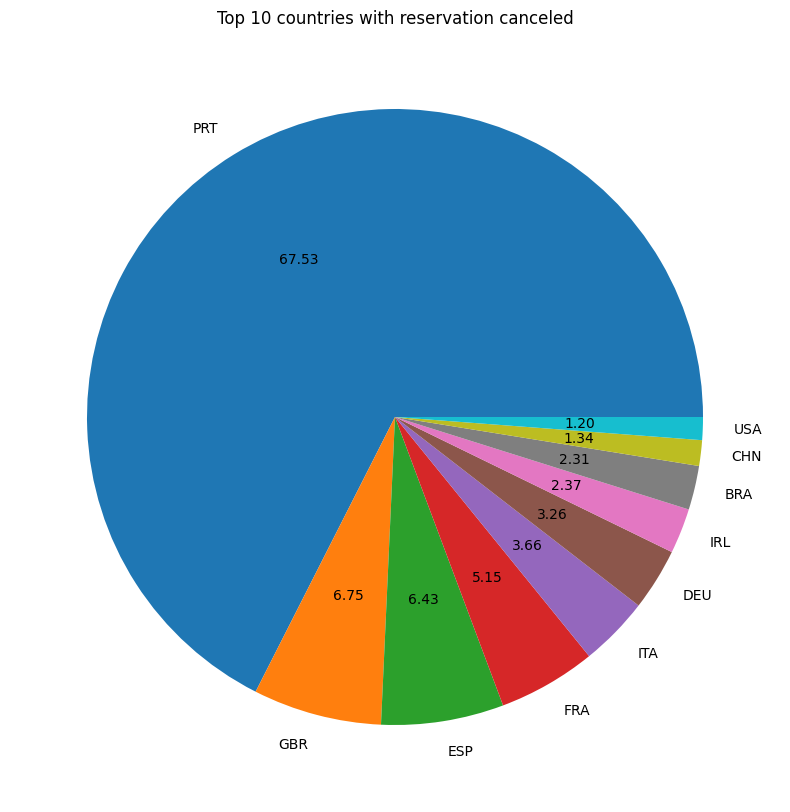

CPU times: user 37.8 ms, sys: 3.15 ms, total: 40.9 ms
Wall time: 40.5 ms


In [45]:
%%time
cancelled_data = data[data['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(10,10))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct='%.2f',labels = top_10_country.index)
plt.show()